In [209]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bson import ObjectId
from scipy.stats import shapiro,levene,mannwhitneyu,ttest_ind
from pymongo import MongoClient
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [210]:
client = MongoClient()
client = MongoClient('mongodb://localhost:27018/?readPreference=primary&appname=MongoDB%20Compass&ssl=false')
db = client.rhtool

In [211]:
df = pd.read_excel (r'Extraction Empreinte interne CADIF V2 .xlsx' )
df=df.dropna()
df=df.set_index('candidate_Id')
df

Niveau Parcours complété  \
candidate_Id                                                         
5f0ee5b8ba74ba00184115e6                Conforme               OUI   
5f0eb920ba74ba0018410d5b  Supérieur aux attentes               OUI   
5f0ebe046832940019b5e174  Supérieur aux attentes               OUI   
5f0ec6396832940019b5e274  Supérieur aux attentes               OUI   
5f0ec6576832940019b5e278  Supérieur aux attentes               OUI   
5f0ecb33ba74ba0018411266           En difficulté               OUI   
5f0ee0186832940019b5e72f  Supérieur aux attentes               OUI   
5f0f0437ba74ba00184116ac  Supérieur aux attentes               OUI   
5f0f09016832940019b5ea92                Conforme               OUI   
5f1046476832940019b5eedd                Conforme               OUI   
5f104831f1a73d001a4d0010                Conforme               OUI   
5f11a11e6832940019b5fbec  Supérieur aux attentes               OUI   
5f11c226ba74ba0018412a0b           En difficulté               OUI   
5f11a0d36832940019b5fbdc           En difficulté               OUI   
5f11b3b1ba74ba00184128b5  Supérieur aux attentes               OUI   
5f119eaa6832940019b5fba4                Conforme               OUI   
5f119e266832940019b5fb8f           En difficulté               OUI   
5f1199bdf1a73d001a4d0d3e                Conforme               OUI   
5f116fecba74ba0018412427           En difficulté               OUI   
5f1145a8f1a73d001a4d0799           En difficulté               OUI   
5f11bb4df1a73d001a4d12fe           En difficulté               OUI   
5f12f5856832940019b5ffd0  Supérieur aux attentes               OUI   
5f12c370f1a73d001a4d149f  Supérieur aux attentes               OUI   
5f1413696832940019b60196           En difficulté               OUI   
5f12a2b7ba74ba0018412ba5  Supérieur aux attentes               OUI   
5f157bd26832940019b60534                Conforme               OUI   
5f15a0c5ba74ba0018413353  Supérieur aux attentes               OUI   
5f15d56e6832940019b608c5           En difficulté               OUI   
5f16da04f1a73d001a4d2363                Conforme               OUI   
5f16e986f1a73d001a4d271b           En difficulté               OUI   
5f16db306832940019b6116f                Conforme               OUI   
5f16d8f5f1a73d001a4d2355                Conforme               OUI   
5f070b7a25469100190fb2b0                Conforme               OUI   
5f16be056832940019b60d8c                Conforme               OUI   
5f16ac40f1a73d001a4d1e66           En difficulté               OUI   
5f16d2236832940019b60f64  Supérieur aux attentes               OUI   
5f16adf2f1a73d001a4d1ed4  Supérieur aux attentes               OUI   
5f18a4486832940019b61f8c  Supérieur aux attentes               OUI   
5f1830fdba74ba0018414721                Conforme               OUI   
5f183e9ef1a73d001a4d320f  Supérieur aux attentes               OUI   
5f184db5ba74ba00184148f6  Supérieur aux attentes               OUI   

                         Note interne (position)  
candidate_Id                                      
5f0ee5b8ba74ba00184115e6       Empreinte interne  
5f0eb920ba74ba0018410d5b       Empreinte interne  
5f0ebe046832940019b5e174       Empreinte interne  
5f0ec6396832940019b5e274       Empreinte interne  
5f0ec6576832940019b5e278       Empreinte interne  
5f0ecb33ba74ba0018411266       Empreinte interne  
5f0ee0186832940019b5e72f       Empreinte interne  
5f0f0437ba74ba00184116ac       Empreinte interne  
5f0f09016832940019b5ea92       Empreinte interne  
5f1046476832940019b5eedd       Empreinte interne  
5f104831f1a73d001a4d0010       Empreinte interne  
5f11a11e6832940019b5fbec       Empreinte interne  
5f11c226ba74ba0018412a0b       Empreinte interne  
5f11a0d36832940019b5fbdc       Empreinte interne  
5f11b3b1ba74ba00184128b5       Empreinte interne  
5f119eaa6832940019b5fba4       Empreinte interne  
5f119e266832940019b5fb8f       Empreinte interne  
5f1199bdf1a73d001a4d0d3e       Empreinte interne  
5f116fecba7

In [212]:
listeIndex=df.index
listeIndex


Index(['5f0ee5b8ba74ba00184115e6', '5f0eb920ba74ba0018410d5b',
       '5f0ebe046832940019b5e174', '5f0ec6396832940019b5e274',
       '5f0ec6576832940019b5e278', '5f0ecb33ba74ba0018411266',
       '5f0ee0186832940019b5e72f', '5f0f0437ba74ba00184116ac',
       '5f0f09016832940019b5ea92', '5f1046476832940019b5eedd',
       '5f104831f1a73d001a4d0010', '5f11a11e6832940019b5fbec',
       '5f11c226ba74ba0018412a0b', '5f11a0d36832940019b5fbdc',
       '5f11b3b1ba74ba00184128b5', '5f119eaa6832940019b5fba4',
       '5f119e266832940019b5fb8f', '5f1199bdf1a73d001a4d0d3e',
       '5f116fecba74ba0018412427', '5f1145a8f1a73d001a4d0799',
       '5f11bb4df1a73d001a4d12fe', '5f12f5856832940019b5ffd0',
       '5f12c370f1a73d001a4d149f', '5f1413696832940019b60196',
       '5f12a2b7ba74ba0018412ba5', '5f157bd26832940019b60534',
       '5f15a0c5ba74ba0018413353', '5f15d56e6832940019b608c5',
       '5f16da04f1a73d001a4d2363', '5f16e986f1a73d001a4d271b',
       '5f16db306832940019b6116f', '5f16d8f5f1a73d001a4

In [213]:
dfSelection = pd.DataFrame(columns = ['CandidateId',"Selected"])  

In [214]:
for i in listeIndex :
    if (df.loc[i]['Niveau']=="En difficulté"):
        dfSelection.loc[-1] = [i, "False"]
        dfSelection.index = dfSelection.index + 1
    else : 
        dfSelection.loc[-1] = [i, "True"]
        dfSelection.index = dfSelection.index + 1

In [215]:
dfSelection["CandidateId"] = dfSelection["CandidateId"].apply(lambda x:ObjectId(x))
dfSelection=dfSelection.set_index('CandidateId')
dfSelection

Selected
CandidateId                      
5f0ee5b8ba74ba00184115e6     True
5f0eb920ba74ba0018410d5b     True
5f0ebe046832940019b5e174     True
5f0ec6396832940019b5e274     True
5f0ec6576832940019b5e278     True
5f0ecb33ba74ba0018411266    False
5f0ee0186832940019b5e72f     True
5f0f0437ba74ba00184116ac     True
5f0f09016832940019b5ea92     True
5f1046476832940019b5eedd     True
5f104831f1a73d001a4d0010     True
5f11a11e6832940019b5fbec     True
5f11c226ba74ba0018412a0b    False
5f11a0d36832940019b5fbdc    False
5f11b3b1ba74ba00184128b5     True
5f119eaa6832940019b5fba4     True
5f119e266832940019b5fb8f    False
5f1199bdf1a73d001a4d0d3e     True
5f116fecba74ba0018412427    False
5f1145a8f1a73d001a4d0799    False
5f11bb4df1a73d001a4d12fe    False
5f12f5856832940019b5ffd0     True
5f12c370f1a73d001a4d149f     True
5f1413696832940019b60196    False
5f12a2b7ba74ba0018412ba5     True
5f157bd26832940019b60534     True
5f15a0c5ba74ba0018413353     True
5f15d56e6832940019b608c5    False
5f16da04f1a73d001a4d2363     True
5f16e986f1a73d001a4d271b    False
5f16db306832940019b6116f     True
5f16d8f5f1a73d001a4d2355     True
5f070b7a25469100190fb2b0     True
5f16be056832940019b60d8c     True
5f16ac40f1a73d001a4d1e66    False
5f16d2236832940019b60f64     True
5f16adf2f1a73d001a4d1ed4     True
5f18a4486832940019b61f8c     True
5f1830fdba74ba0018414721     True
5f183e9ef1a73d001a4d320f     True
5f184db5ba74ba00184148f6     True

In [216]:
approuvedCandidates=dfSelection[(dfSelection.Selected=="True")].index
noApprouvedCandidates=dfSelection[(dfSelection.Selected=="False")].index

In [217]:
def get_candidate_score(db,step_id):
    
    """ Fetch candidates score for each axis with step ObjectId as filter
    """

    query_result = db.axescores.aggregate(
        [
            {
                "$match":{
                    "step":step_id
                }
            },
            {
                "$project":{
                    "candidateId":"$candidate",
                    "step":1,
                    "position":1,
                    "axe":1,
                    "score":1

                }
            },
            {
            "$lookup":{
                "from": "axes",       
                "localField": "axe",   
                "foreignField": "_id", 
                "as": "axes_info"        
            }
            },
            { "$unwind": { "path": "$axes_info",
                        "preserveNullAndEmptyArrays": True } 
            },
            {  
                "$project":{
                    "candidateId":1,
                    "step":1,
                    "axe":1,
                    "score":1,
                    "name_fr":"$axes_info.name.fr",
                    "name_en":"$axes_info.name.en"                
                }
                
            },
            {
                "$lookup":{
                    "from": "candidates",       
                    "localField": "candidateId",   
                    "foreignField": "_id", 
                    "as": "candidate_info"        
                }
            },  
            {
            "$unwind":{ "path": "$candidate_info",
                        "preserveNullAndEmptyArrays": True }
            },
            {
                "$project":{
                    "candidateId":1,
                    "step":1,
                    "email":"$candidate_info.email",
                    "firstName":"$candidate_info.firstName",
                    "lastName":"$candidate_info.lastName",
                    "axe":1,
                    "score":1,
                    "name_fr":1,
                    "name_en":1        
                }
            },
        ]
    )

    columns = ["candidateId","step","email","firstName","lastName","axe","score","name_fr","name_en"]

    return query_result, columns

In [218]:
step=ObjectId('5f06efc625469100190fb23d')
query_result,columns = get_candidate_score(db,step)
score_pdf = pd.DataFrame(query_result,columns = columns)
score_pdf = pd.pivot_table(score_pdf,index="candidateId",columns="name_fr",values="score",aggfunc="first")

In [219]:
score_pdf=score_pdf.reset_index()
score_pdf

name_fr               candidateId  Capacité d'analyse  \
0        5f070b7a25469100190fb2b0                  59   
1        5f0eb920ba74ba0018410d5b                  34   
2        5f0ebe046832940019b5e174                  71   
3        5f0ec6396832940019b5e274                  50   
4        5f0ec6576832940019b5e278                  98   
5        5f0ecb33ba74ba0018411266                  69   
6        5f0ee0186832940019b5e72f                  71   
7        5f0ee5b8ba74ba00184115e6                  75   
8        5f0f0437ba74ba00184116ac                  60   
9        5f0f09016832940019b5ea92                  35   
10       5f1046476832940019b5eedd                  48   
11       5f104831f1a73d001a4d0010                  50   
12       5f116fecba74ba0018412427                  75   
13       5f1199bdf1a73d001a4d0d3e                  61   
14       5f119e266832940019b5fb8f                  12   
15       5f119eaa6832940019b5fba4                  96   
16       5f11a0d36832940019b5fbdc                  52   
17       5f11a11e6832940019b5fbec                  97   
18       5f11b3b1ba74ba00184128b5                  67   
19       5f11bb4df1a73d001a4d12fe                  12   
20       5f11c226ba74ba0018412a0b                  50   
21       5f12a2b7ba74ba0018412ba5                  24   
22       5f12c370f1a73d001a4d149f                  35   
23       5f12f5856832940019b5ffd0                  48   
24       5f1413696832940019b60196                  28   
25       5f157bd26832940019b60534                  50   
26       5f15a0c5ba74ba0018413353                  59   
27       5f15d56e6832940019b608c5                  12   
28       5f16ac40f1a73d001a4d1e66                  41   
29       5f16adf2f1a73d001a4d1ed4                  50   
30       5f16be056832940019b60d8c                  75   
31       5f16d2236832940019b60f64                  38   
32       5f16d8f5f1a73d001a4d2355                  86   
33       5f16da04f1a73d001a4d2363                  75   
34       5f16db306832940019b6116f                  88   
35       5f16e986f1a73d001a4d271b                  75   
36       5f1830fdba74ba0018414721                  70   
37       5f183e9ef1a73d001a4d320f                  75   
38       5f184db5ba74ba00184148f6                  95   
39       5f18a4486832940019b61f8c                  46   
40       5f1aa8efba74ba001841525c                  88   

name_fr  Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                       69                               55   
1                                       66                               52   
2                                       84                               87   
3                                       66                               71   
4                                       62                               64   
5                                       78                               67   
6                                       88                               91   
7                                       92                               82   
8                                       70                               71   
9                                       46                               49   
10                                      76                               76   
11                                      73                               83   
12                                      75                               86   
13                                      55                               76   
14                                      55                               60   
15                                      77                               82   
16                                      53                               49   
17                                      75                               72   
18                                      66                               73   
19                       

In [220]:
def get_minigames_result(db,step_id):
    
    """ 
    Fetch minigame results with step ObjectId as filter
        
    """

    query_result = db.minigameresults.aggregate(
        [
        {
            "$match" : {
                "step":step_id
            }
        }, 
        {
            "$project" : {
                "candidate":1,
                "miniGame":1,
                "type":1,
                "step":1,
                "averageTime":1,
                "date":1,
                "max":1,
                "nbCorrect":1,
                "noteGlobal":1,
                "Tmax":1,
                "Tmin":1,
                "scorePonderation":1,
                "timePonderation":1,             
                "time_attempts" : "$blocks.attempts.time"
            }
        },
        {"$unwind":"$time_attempts"},
        {"$unwind":"$time_attempts"},
        {
          "$group" :
            {
              "_id" : {
                "candidate":"$candidate",
                "miniGame":"$miniGame",
                "type":"$type",
                "step":"$step",
                "averageTime":"$averageTime",
                "date":"$date",
                "max":"$max",
                "Tmax":"$Tmax",
                "Tmin":"$Tmin",
                "scorePonderation":"$scorePonderation",
                "timePonderation":"$timePonderation",  
                "nbCorrect":"$nbCorrect",
                "noteGlobal":"$noteGlobal"
              },
              "total_time_attempts": { "$sum":"$time_attempts" }
            }
         },
         {
             "$project":{
                "_id":0,
                "candidate":"$_id.candidate",
                "miniGame":"$_id.miniGame",
                "type":"$_id.type",
                "step":"$_id.step",
                "averageTime":"$_id.averageTime",
                "date":"$_id.date",
                "max":"$_id.max",
                "Tmax":"$_id.Tmax",
                "Tmin":"$_id.Tmin",
                "scorePonderation":"$_id.scorePonderation",
                "timePonderation":"$_id.timePonderation",  
                "nbCorrect":"$_id.nbCorrect",
                "noteGlobal":"$_id.noteGlobal",
                "total_time_attempts":1

             }
         },
          {
        "$lookup":{
            "from": "minigames",       
            "localField": "miniGame",   
            "foreignField": "_id", 
            "as": "minigame_info"                   
        }
        },
        {"$unwind" : "$minigame_info"},
        {
        "$project":{
            "candidate":1,
            "miniGame":1,
            "name":"$minigame_info.name",
            "version":"$minigame_info.description",
            "useTimeForScoring":"$minigame_info.useTimeForScoring",
            "type":1,
            "step":1,
            "averageTime":1,
            "date":1,
            "max":1,
            "Tmax":1,
            "Tmin":1,
            "scorePonderation":1,
            "timePonderation":1,  
            "nbCorrect":1,
            "noteGlobal":1,
            "total_time_attempts":1

        }
        },
        {
        "$lookup":{
            "from": "candidates",       
            "localField": "candidate",   
            "foreignField": "_id", 
            "as": "candidate_info"        
        }
        },
        {"$unwind" : "$candidate_info"},
        {
            "$project" : {
                "candidate":1,
                "mail":"$candidate_info.email",
                "miniGame":1,
                "name":1,
                "version":1,
                "useTimeForScoring":1,
                "type":1,
                "step":1,
                "averageTime":1,
                "date":1,
                "max":1,
                "Tmax":1,
                "Tmin":1,
                "scorePonderation":1,
                "timePonderation":1,  
                "nbCorrect":1,
                "noteGlobal":1,
                "total_time_attempts":1

            }
        }
        
        ]
    )

    columns = ["candidate","mail","miniGame","name","version","useTimeForScoring","type","step","averageTime","date","max","Tmax","Tmin","scorePonderation","timePonderation","nbCorrect","noteGlobal","total_time_attempts"] 

    return query_result, columns

In [221]:
result_query,columns = get_minigames_result(db,step)
minigame_pdf = pd.DataFrame(result_query,columns=columns)
grade_minigame_pdf = (
    minigame_pdf[["candidate","name","noteGlobal"]]
    .pivot_table(index="candidate",columns=["name"],values="noteGlobal")
)

In [222]:
minigame_pdf=minigame_pdf.dropna(subset=['noteGlobal'])
minigame_pdf


candidate                                mail  \
0    5f1413696832940019b60196          martine.gablin@ca-paris.fr   
1    5f070b7a25469100190fb2b0  jelena.obrenovic-bluon@ca-paris.fr   
2    5f157bd26832940019b60534        jerome.jeanvoine@ca-paris.fr   
3    5f16be056832940019b60d8c          margaux.bimont@ca-paris.fr   
4    5f16adf2f1a73d001a4d1ed4         jennifer.briant@ca-paris.fr   
..                        ...                                 ...   
218  5f1830fdba74ba0018414721          laureane.costa@ca-paris.fr   
219  5f16d8f5f1a73d001a4d2355           audrey.maretz@ca-paris.fr   
220  5f1046476832940019b5eedd          maeva.mekheldi@ca-paris.fr   
221  5f12c370f1a73d001a4d149f               elsa.pais@ca-paris.fr   
222  5f0ebe046832940019b5e174          romain.leclech@ca-paris.fr   

                     miniGame            name               version  \
0    5c2cc7b49338a530f58d32e3  taskSwitching2    Version 4 (sans I)   
1    5addff28015fa2e08c967a2f    londonTowers             Version 1   
2    5d25f7968ab7af0157ef0f2a     cooperation             Version 1   
3    5c2cc7b49338a530f58d32e3  taskSwitching2    Version 4 (sans I)   
4    5b589c9fc85c1da32b712cb1         anagram  Version 2 (bilingue)   
..                        ...             ...                   ...   
218  5b60496bc85c1da32bc405a4     workMemory2             Version 2   
219  5b60496bc85c1da32bc405a4     workMemory2             Version 2   
220  5d25f7968ab7af0157ef0f2a     cooperation             Version 1   
221  5c2cc7b49338a530f58d32e3  taskSwitching2    Version 4 (sans I)   
222  5d25f7968ab7af0157ef0f2a     cooperation             Version 1   

    useTimeForScoring                      type                      step  \
0                True  TaskSwitching2GameResult  5f06efc625469100190fb23d   
1                 NaN    LondonTowersGameResult  5f06efc625469100190fb23d   
2               False     CooperationGameResult  5f06efc625469100190fb23d   
3                True  TaskSwitching2GameResult  5f06efc625469100190fb23d   
4                 NaN         AnagramGameResult  5f06efc625469100190fb23d   
..                ...                       ...                       ...   
218              True     WorkMemory2GameResult  5f06efc625469100190fb23d   
219              True     WorkMemory2GameResult  5f06efc625469100190fb23d   
220             False     CooperationGameResult  5f06efc625469100190fb23d   
221              True  TaskSwitching2GameResult  5f06efc625469100190fb23d   
222             False     CooperationGameResult  5f06efc625469100190fb23d   

      averageTime                    date    max    Tmax    Tmin  \
0     2757.812500 2020-07-19 09:43:22.840   96.0  3147.0  2030.0   
1    80100.000000 2020-07-21 13:18:10.659    1.0     NaN     NaN   
2     4500.000000 2020-07-20 11:39:35.512  100.0     NaN     NaN   
3     2168.750000 2020-07-21 10:10:48.438   96.0  3147.0  2030.0   
4     9925.000000 2020-07-22 10:56:47.458   33.0     NaN     NaN   
..            ...                     ...    ...     ...     ...   
218   1808.888889 2020-07-22 12:49:55.061  111.0  3049.0  1836.0   
219   1978.888889 2020-07-21 12:21:05.776  111.0  3049.0  1836.0   
220   9690.000000 2020-07-16 12:52:43.864  100.0     NaN     NaN   
221   2076.562500 2020-07-18 09:45:32.730   96.0  3147.0  2030.0   
222   5445.000000 2020-07-15 09:01:49.653  100.0     NaN     NaN   

     scorePonderation  timePonderation  nbCorrect  noteGlobal  \
0                0.75             0.25       45.0   39.239322   
1                 NaN              NaN        0.0    0.000000   
2                 NaN              NaN       83.0   83.000000   
3                0.75             0.25       45.0   45.419336   
4                 NaN              NaN        4.0   11.927967   
..                ...              ...        ...         ...   
218              0.80             0.20       82.0   73.873874   
219              0.80             0.20       68.0   59.817971   
220        

In [223]:
def get_questionnaire_result(db,step_id):
    
    """ 
    Fetch questionnaire results with step Objectid as filter
        
    """

    query_result = db.questionnaireresults.aggregate(
        [
           {
               "$match" : {
                   "step":step_id
               }
           }, 
           {
               "$project" : {
                "candidate":1,
                "questionnaire":1,
                "step":1,
                "enter":1,
                "exit":1,
                "averageTime":1,
                "noteGlobal":1

               }
           },
            {
            "$lookup":{
                "from": "questionnaires",       
                "localField": "questionnaire",   
                "foreignField": "_id", 
                "as": "questionnaire_info"        
            }
            },
            {"$unwind" : "$questionnaire_info"},
            {"$project" : {
                "candidate":1,
                "questionnaire":1,
                "step":1,
                "enter":1,
                "exit":1,
                "averageTime":1,
                "noteGlobal":1,
                "useTimeForScoring":"$questionnaire_info.useTimeForScoring",
                "questionnaire_name":"$questionnaire_info.name"
            }},
            {
            "$lookup":{
                "from": "candidates",       
                "localField": "candidate",   
                "foreignField": "_id", 
                "as": "candidate_info"        
            }
            },
            {"$unwind" : "$candidate_info"},
            {
                "$project" : {
                    "candidate":1,
                    "mail":"$candidate_info.email",
                    "questionnaire":1,
                    "step":1,
                    "questionnaire_name":1,
                    "useTimeForScoring":1,
                    "enter":1,
                    "exit":1,
                    "averageTime":1,
                    "noteGlobal":1
                }
            }

        ]
    )


    columns = [ "candidate",
                "mail",
                "questionnaire",
                "step",
                "questionnaire_name",
                "useTimeForScoring",
                "enter",
                "exit",
                "averageTime",
                "noteGlobal"]

    return query_result,columns

In [224]:
result_query,columns = get_questionnaire_result(db,step)
questionnaire_pdf = pd.DataFrame(result_query,columns=columns)
grade_questionnaire_pdf = (
    questionnaire_pdf[["candidate","questionnaire_name","noteGlobal"]]
    .pivot_table(index="candidate",columns=["questionnaire_name"],values="noteGlobal")
    
)

In [225]:
grade_questionnaire_pdf=grade_questionnaire_pdf.reset_index()
grade_questionnaire_pdf

questionnaire_name                 candidate  Feedback empreinte interne  \
0                   5f070b7a25469100190fb2b0                        50.0   
1                   5f0eb920ba74ba0018410d5b                         0.0   
2                   5f0ebe046832940019b5e174                        75.0   
3                   5f0ec6396832940019b5e274                       100.0   
4                   5f0ec6576832940019b5e278                        75.0   
5                   5f0ecb33ba74ba0018411266                        75.0   
6                   5f0ee0186832940019b5e72f                        75.0   
7                   5f0ee5b8ba74ba00184115e6                        75.0   
8                   5f0f0437ba74ba00184116ac                        50.0   
9                   5f0f05fcba74ba001841172d                         NaN   
10                  5f0f09016832940019b5ea92                        25.0   
11                  5f1046476832940019b5eedd                        75.0   
12                  5f104831f1a73d001a4d0010                        75.0   
13                  5f1145a8f1a73d001a4d0799                        50.0   
14                  5f116fecba74ba0018412427                       100.0   
15                  5f1199bdf1a73d001a4d0d3e                        25.0   
16                  5f119e266832940019b5fb8f                        50.0   
17                  5f119eaa6832940019b5fba4                        75.0   
18                  5f11a0d36832940019b5fbdc                        50.0   
19                  5f11a11e6832940019b5fbec                        50.0   
20                  5f11b3b1ba74ba00184128b5                       100.0   
21                  5f11bb4df1a73d001a4d12fe                         0.0   
22                  5f11c226ba74ba0018412a0b                        50.0   
23                  5f12a2b7ba74ba0018412ba5                        50.0   
24                  5f12c370f1a73d001a4d149f                        75.0   
25                  5f12f5856832940019b5ffd0                        75.0   
26                  5f1413696832940019b60196                        50.0   
27                  5f157bd26832940019b60534                        75.0   
28                  5f15a0c5ba74ba0018413353                        25.0   
29                  5f15d56e6832940019b608c5                        75.0   
30                  5f16ac40f1a73d001a4d1e66                        25.0   
31                  5f16adf2f1a73d001a4d1ed4                         0.0   
32                  5f16be056832940019b60d8c                        50.0   
33                  5f16d2236832940019b60f64                        25.0   
34                  5f16d8f5f1a73d001a4d2355                        50.0   
35                  5f16da04f1a73d001a4d2363                       100.0   
36                  5f16db306832940019b6116f                        50.0   
37                  5f16e986f1a73d001a4d271b                       100.0   
38                  5f1731a2f1a73d001a4d2ce0                         NaN   
39                  5f1830fdba74ba0018414721                        25.0   
40                  5f183e9ef1a73d001a4d320f                        50.0   
41                  5f184db5ba74ba00184148f6                        75.0   
42                  5f18a4486832940019b61f8c                        75.0   
43                  5f1aa8efba74ba001841525c                        50.0   

questionnaire_name  Reconnaissance d'expressions faciales - version 4 (courte) (R&D)  \
0                                                           62.125915                  
1                                                           52.500000                  
2                                                          100.000000                  
3                                                           90.000000                  
4                                                           91.091197                  
5                                                  

In [226]:
result=score_pdf.join(minigame_pdf.set_index('candidate'),on="candidateId")

In [227]:
result

candidateId  Capacité d'analyse  \
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
..                       ...                 ...   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   

    Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
..                                ...                              ...   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   

    Organisation, planification  Orientation résultat, ténacité  \
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
..                          ...                             ...   
40                            0                              20   
40                            0                              20   
40                            0                              20   
40                            0                              20   
40                            0                              20   

    Souplesse mentale, multitasking                                mail  \
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
..                              ...                                 ...   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   

                    miniGame            name  ...   averageTime  \
0   5addff28015fa2e08c967a2f    londonTowers  ...  80100.000000   
0   5c2cc7b49338a530f58d32e3  taskSwitching2  ...   2117.187500   
0   5b60496bc85c1da32bc405a4     workMemory2  ...   3128.888889   
0   5b589c9fc85c1da32b712cb1         anagram  ...  33125.000000   
0   5d25f7968ab7af0157ef0f2a     cooperation  ...   6630.000000   
..                       ...             ...  ...           ...   
40  5d25f7968ab7af0157ef0f2a     cooperation  ...   6330.000000   
40  5b60496bc85c1da32bc405a4     workMemory2  ...   2028.888889   
40  5c2cc7b49338a530f58d32e3  taskSwitching2  ...   2229.687500   
40  5addff28015fa2e08c967a2f    londonTowers  ...  73650.000000   
40  5b589c9fc85c1da32b712cb1         anagram  ...  18650.000

In [228]:
result=result.join(grade_questionnaire_pdf.set_index('candidate'),on="candidateId")

In [229]:
result

candidateId  Capacité d'analyse  \
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
..                       ...                 ...   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   

    Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
..                                ...                              ...   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   

    Organisation, planification  Orientation résultat, ténacité  \
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
..                          ...                             ...   
40                            0                              20   
40                            0                              20   
40                            0                              20   
40                            0                              20   
40                            0                              20   

    Souplesse mentale, multitasking                                mail  \
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
..                              ...                                 ...   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   

                    miniGame            name  ...    Tmax    Tmin  \
0   5addff28015fa2e08c967a2f    londonTowers  ...     NaN     NaN   
0   5c2cc7b49338a530f58d32e3  taskSwitching2  ...  3147.0  2030.0   
0   5b60496bc85c1da32bc405a4     workMemory2  ...  3049.0  1836.0   
0   5b589c9fc85c1da32b712cb1         anagram  ...     NaN     NaN   
0   5d25f7968ab7af0157ef0f2a     cooperation  ...     NaN     NaN   
..                       ...             ...  ...     ...     ...   
40  5d25f7968ab7af0157ef0f2a     cooperation  ...     NaN     NaN   
40  5b60496bc85c1da32bc405a4     workMemory2  ...  3049.0  1836.0   
40  5c2cc7b49338a530f58d32e3  taskSwitching2  ...  3147.0  2030.0   
40  5addff28015fa2e08c967a2f    londonTowers  ...     NaN     NaN   
40  5b589c9fc85c1da32b712cb1         a

In [230]:
result=result.join(dfSelection,on="candidateId")

In [231]:
result

candidateId  Capacité d'analyse  \
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
..                       ...                 ...   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   
40  5f1aa8efba74ba001841525c                  88   

    Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
..                                ...                              ...   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   
40                                 51                               76   

    Organisation, planification  Orientation résultat, ténacité  \
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
..                          ...                             ...   
40                            0                              20   
40                            0                              20   
40                            0                              20   
40                            0                              20   
40                            0                              20   

    Souplesse mentale, multitasking                                mail  \
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
..                              ...                                 ...   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   
40                               79             marina.toumi@outlook.fr   

                    miniGame            name  ...    Tmin scorePonderation  \
0   5addff28015fa2e08c967a2f    londonTowers  ...     NaN              NaN   
0   5c2cc7b49338a530f58d32e3  taskSwitching2  ...  2030.0             0.75   
0   5b60496bc85c1da32bc405a4     workMemory2  ...  1836.0             0.80   
0   5b589c9fc85c1da32b712cb1         anagram  ...     NaN              NaN   
0   5d25f7968ab7af0157ef0f2a     cooperation  ...     NaN              NaN   
..                       ...             ...  ...     ...              ...   
40  5d25f7968ab7af0157ef0f2a     cooperation  ...     NaN              NaN   
40  5b60496bc85c1da32bc405a4     workMemory2  ...  1836.0             0.80   
40  5c2cc7b49338a530f58d32e3  taskSwitching2  ...  2030.0             0.75   
40  5addff28015fa

In [232]:
i=result[(result.candidateId == ObjectId('5f1aa8efba74ba001841525c') )].index
result=result.drop(i)

In [233]:
result

candidateId  Capacité d'analyse  \
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
0   5f070b7a25469100190fb2b0                  59   
..                       ...                 ...   
39  5f18a4486832940019b61f8c                  46   
39  5f18a4486832940019b61f8c                  46   
39  5f18a4486832940019b61f8c                  46   
39  5f18a4486832940019b61f8c                  46   
39  5f18a4486832940019b61f8c                  46   

    Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
0                                  69                               55   
..                                ...                              ...   
39                                 94                               73   
39                                 94                               73   
39                                 94                               73   
39                                 94                               73   
39                                 94                               73   

    Organisation, planification  Orientation résultat, ténacité  \
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
0                             0                              55   
..                          ...                             ...   
39                           22                              37   
39                           22                              37   
39                           22                              37   
39                           22                              37   
39                           22                              37   

    Souplesse mentale, multitasking                                mail  \
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
0                                84  jelena.obrenovic-bluon@ca-paris.fr   
..                              ...                                 ...   
39                               95        dilek.orenleloup@ca-paris.fr   
39                               95        dilek.orenleloup@ca-paris.fr   
39                               95        dilek.orenleloup@ca-paris.fr   
39                               95        dilek.orenleloup@ca-paris.fr   
39                               95        dilek.orenleloup@ca-paris.fr   

                    miniGame            name  ...    Tmin scorePonderation  \
0   5addff28015fa2e08c967a2f    londonTowers  ...     NaN              NaN   
0   5c2cc7b49338a530f58d32e3  taskSwitching2  ...  2030.0             0.75   
0   5b60496bc85c1da32bc405a4     workMemory2  ...  1836.0             0.80   
0   5b589c9fc85c1da32b712cb1         anagram  ...     NaN              NaN   
0   5d25f7968ab7af0157ef0f2a     cooperation  ...     NaN              NaN   
..                       ...             ...  ...     ...              ...   
39  5b589c9fc85c1da32b712cb1         anagram  ...     NaN              NaN   
39  5d25f7968ab7af0157ef0f2a     cooperation  ...     NaN              NaN   
39  5b60496bc85c1da32bc405a4     workMemory2  ...  1836.0             0.80   
39  5c2cc7b49338a

In [234]:
approuvedCandidates
noApprouvedCandidates

Index([5f0ecb33ba74ba0018411266, 5f11c226ba74ba0018412a0b,
       5f11a0d36832940019b5fbdc, 5f119e266832940019b5fb8f,
       5f116fecba74ba0018412427, 5f1145a8f1a73d001a4d0799,
       5f11bb4df1a73d001a4d12fe, 5f1413696832940019b60196,
       5f15d56e6832940019b608c5, 5f16e986f1a73d001a4d271b,
       5f16ac40f1a73d001a4d1e66],
      dtype='object', name='CandidateId')

In [235]:
def verification (data1,data2):
    if((str(ttest_ind(data1,data2)[1])=="nan") or (str(ttest_ind(data1,data2,equal_var="False")[1])=="nan")or (str(mannwhitneyu(data1,data2)[1])=="nan") ):
        return(False)
    else : return(True)

In [236]:
selected=[]
noSelected=[]
itemSelected=[]
itemNoSelected=[]
pSeuil=0.05
testResult=0
test=""
def analyse(data,item):
    selected=data[data["Selected"]=="True"]
    itemSelected=selected[item]
    noSelected=data[data["Selected"]=="False"]
    itemNoSelected=noSelected[item]
    
    
    verif=verification(itemSelected,itemNoSelected)
    if (verif==True):
        plt.title(item)
        plt.hist(data[item])
        plt.xlabel('Note',fontsize=10)
        plt.ylabel('Nombre de candidats',fontsize=10)
        plt.show()
       
        plt.title(str(item)+":"+"Candidats Retenus VS Candidats Non Retenus")
        plt.hist(itemSelected, alpha = 0.5, label='Candidats Retenus')
        plt.hist(itemNoSelected,alpha = 0.3, label=' Candidats Non Retenus')
        plt.legend(loc="upper left")
        plt.xlabel('Note',fontsize=10)
        plt.ylabel('Nombre de candidats',fontsize=10)
        plt.show()
    
        plt.title(str(item)+" :"+"Répartition des résultats des deux groupes")
        p=plt.boxplot([itemSelected,itemNoSelected],labels=["Candidats Retenus","Candidats Non Retenus"])
        plt.show(p)
    
        print("test de normalité pour la partie des candidats retenus"+str(shapiro(itemSelected)))
        print("test de normalité pour la partie des candidats non retenus"+str(shapiro(itemNoSelected)))
        if ((shapiro(itemSelected)[1] >pSeuil) and (shapiro(itemNoSelected)[1] >pSeuil) ):
            print ("les deux parties de "+item+ " suivent la lois normal")
            print("le résultat du test d'égalité des variances  " +str(levene(itemSelected,itemNoSelected,center="mean")))
            if (levene(itemSelected,itemNoSelected,center="mean")[1]>pSeuil):
                print("l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student")
                testResult= ttest_ind(itemSelected,itemNoSelected)
                print("résulat test de Student"+str(testResult))
                test="T-test"

            else:
                print("l'égalité de variance n'est pas verifiée pour les deux parties donc on applique le test de Welch")
                testResult= ttest_ind(itemSelected,itemNoSelected,equal_var="False")
                print("résulat test de Welch"+ str(testResult))
                test="Welch’s t-test"

            
            
        else :
            print ("les deux parties de "+item+ " ne suivent pas suivent la lois normal donc on applique le Test U")
            testResult =mannwhitneyu(itemSelected,itemNoSelected)
            print("résultat de Test U"+str(testResult))
            test="Mann Whitney U test"
    
        return(testResult,test)
    else:
        testResult=float('NaN'),float('NaN')
        test=""
        return(testResult,test)

In [237]:
axes=[]
for i in score_pdf:
    if(i!="candidateId"):
        axes.append(i)

In [238]:
axes

["Capacité d'analyse",
 "Capacité d'apprentissage, mémoire",
 "Esprit d'équipe, sens du groupe",
 'Organisation, planification',
 'Orientation résultat, ténacité',
 'Souplesse mentale, multitasking']

In [239]:
dataFrameAxes = pd.DataFrame(columns = ['Axe',"Statistic test","Statistic","p-value"])  

In [240]:

resultGames=result.copy()
resultGames=resultGames.drop_duplicates(subset='candidateId',keep='last')
resultGames

candidateId  Capacité d'analyse  \
0   5f070b7a25469100190fb2b0                  59   
1   5f0eb920ba74ba0018410d5b                  34   
2   5f0ebe046832940019b5e174                  71   
3   5f0ec6396832940019b5e274                  50   
4   5f0ec6576832940019b5e278                  98   
5   5f0ecb33ba74ba0018411266                  69   
6   5f0ee0186832940019b5e72f                  71   
7   5f0ee5b8ba74ba00184115e6                  75   
8   5f0f0437ba74ba00184116ac                  60   
9   5f0f09016832940019b5ea92                  35   
10  5f1046476832940019b5eedd                  48   
11  5f104831f1a73d001a4d0010                  50   
12  5f116fecba74ba0018412427                  75   
13  5f1199bdf1a73d001a4d0d3e                  61   
14  5f119e266832940019b5fb8f                  12   
15  5f119eaa6832940019b5fba4                  96   
16  5f11a0d36832940019b5fbdc                  52   
17  5f11a11e6832940019b5fbec                  97   
18  5f11b3b1ba74ba00184128b5                  67   
19  5f11bb4df1a73d001a4d12fe                  12   
20  5f11c226ba74ba0018412a0b                  50   
21  5f12a2b7ba74ba0018412ba5                  24   
22  5f12c370f1a73d001a4d149f                  35   
23  5f12f5856832940019b5ffd0                  48   
24  5f1413696832940019b60196                  28   
25  5f157bd26832940019b60534                  50   
26  5f15a0c5ba74ba0018413353                  59   
27  5f15d56e6832940019b608c5                  12   
28  5f16ac40f1a73d001a4d1e66                  41   
29  5f16adf2f1a73d001a4d1ed4                  50   
30  5f16be056832940019b60d8c                  75   
31  5f16d2236832940019b60f64                  38   
32  5f16d8f5f1a73d001a4d2355                  86   
33  5f16da04f1a73d001a4d2363                  75   
34  5f16db306832940019b6116f                  88   
35  5f16e986f1a73d001a4d271b                  75   
36  5f1830fdba74ba0018414721                  70   
37  5f183e9ef1a73d001a4d320f                  75   
38  5f184db5ba74ba00184148f6                  95   
39  5f18a4486832940019b61f8c                  46   

    Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                  69                               55   
1                                  66                               52   
2                                  84                               87   
3                                  66                               71   
4                                  62                               64   
5                                  78                               67   
6                                  88                               91   
7                                  92                               82   
8                                  70                               71   
9                                  46                               49   
10                                 76                               76   
11                                 73                               83   
12                                 75                               86   
13                                 55                               76   
14                                 55                               60   
15                                 77                               82   
16                                 53                               49   
17                                 75                               72   
18                                 66                               73   
19                                 54                               75   
20                                 52                               72   
21                                 64                               83   
22                                 50                               89   
23                                 78                               80   
24                                

In [252]:
def test (axe,outputData):
    res,test=analyse(resultGames,axe)
    outputData.loc[-1]=[axe,test,res[0],res[1]]
    outputData.index=outputData.index+1

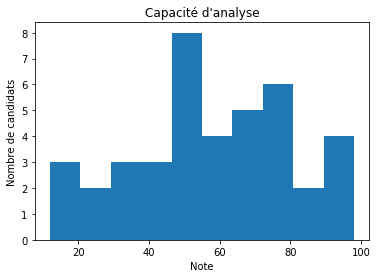

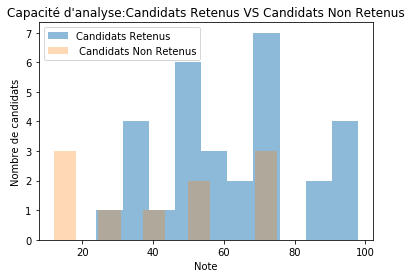

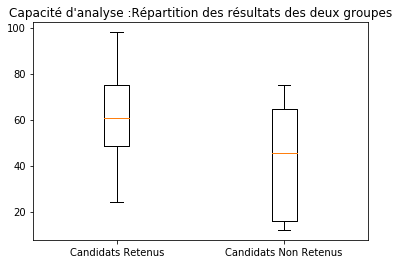

test de normalité pour la partie des candidats retenus(0.9596779346466064, 0.3039512038230896)
test de normalité pour la partie des candidats non retenus(0.8787150979042053, 0.12612977623939514)
les deux parties de Capacité d'analyse suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=1.1205972687557404, pvalue=0.29647281437682105)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=2.5225781403198444, pvalue=0.015957160622494308)


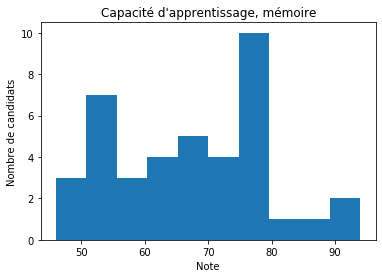

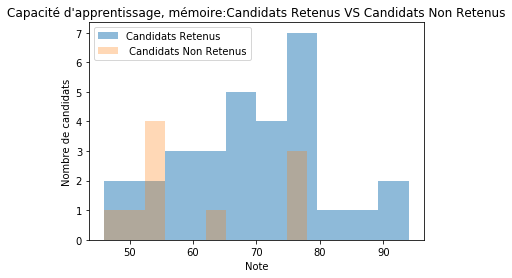

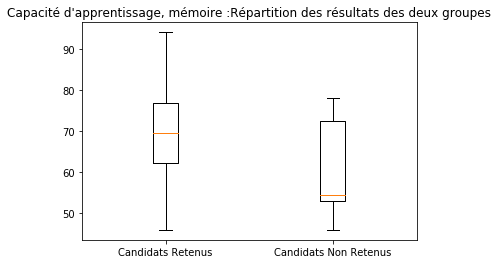

test de normalité pour la partie des candidats retenus(0.985357940196991, 0.943121075630188)
test de normalité pour la partie des candidats non retenus(0.8513733744621277, 0.060315363109111786)
les deux parties de Capacité d'apprentissage, mémoire suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=0.16606841216216206, pvalue=0.6859166001463697)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=2.150199271318916, pvalue=0.03796610513618355)


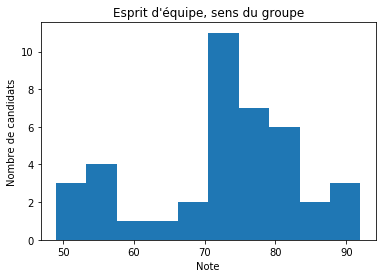

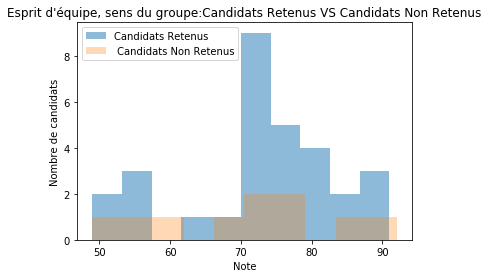

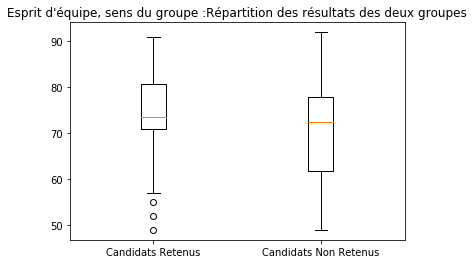

test de normalité pour la partie des candidats retenus(0.9403948783874512, 0.09321362525224686)
test de normalité pour la partie des candidats non retenus(0.9836836457252502, 0.9818099141120911)
les deux parties de Esprit d'équipe, sens du groupe suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=0.8746494509850036, pvalue=0.3555768689278813)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=0.5234576442790788, pvalue=0.603695320895417)


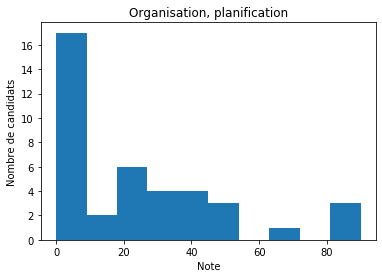

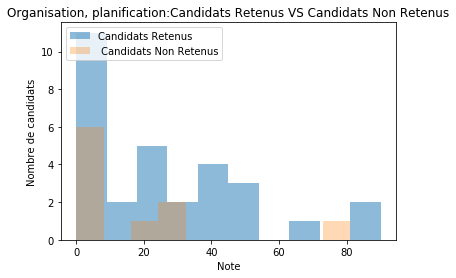

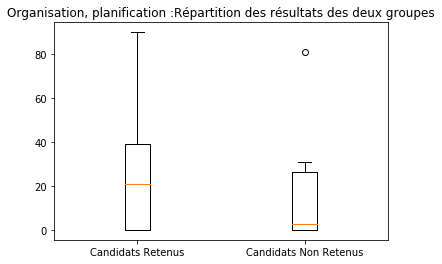

test de normalité pour la partie des candidats retenus(0.8651002645492554, 0.0013057627948001027)
test de normalité pour la partie des candidats non retenus(0.7135231494903564, 0.0012850917410105467)
les deux parties de Organisation, planification ne suivent pas suivent la lois normal donc on applique le Test U
résultat de Test UMannwhitneyuResult(statistic=122.0, pvalue=0.18725745869226157)


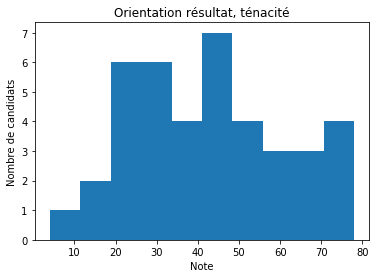

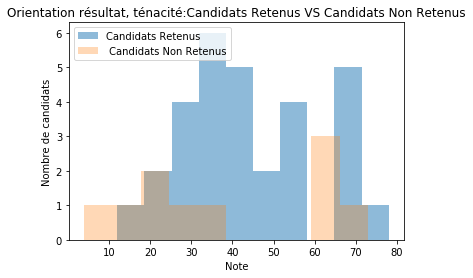

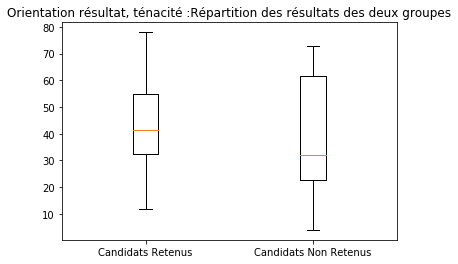

test de normalité pour la partie des candidats retenus(0.9593004584312439, 0.29724642634391785)
test de normalité pour la partie des candidats non retenus(0.9112781882286072, 0.2898867130279541)
les deux parties de Orientation résultat, ténacité suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=3.7538736731673645, pvalue=0.06014393350197469)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=0.7722452491875723, pvalue=0.44474575292863805)


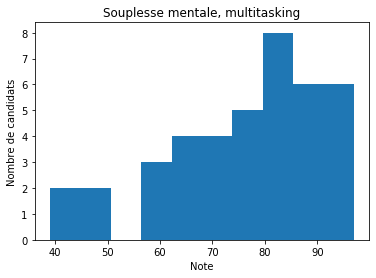

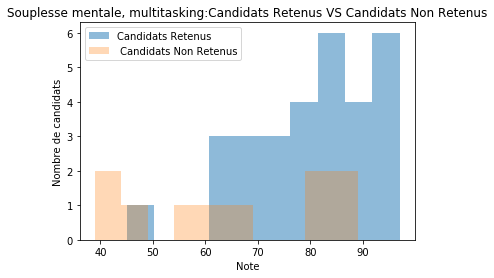

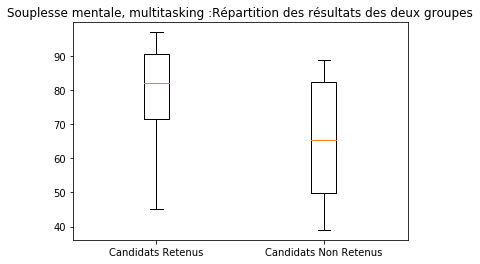

test de normalité pour la partie des candidats retenus(0.9452170133590698, 0.12573499977588654)
test de normalité pour la partie des candidats non retenus(0.9125187397003174, 0.2987440526485443)
les deux parties de Souplesse mentale, multitasking suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=4.3242946657373915, pvalue=0.04437043644097499)
l'égalité de variance n'est pas verifiée pour les deux parties donc on applique le test de Welch
résulat test de WelchTtest_indResult(statistic=2.6082970952003546, pvalue=0.012937090372556827)


In [242]:
for i in axes:
    test(i,dataFrameAxes)

In [243]:
dataFrameAxes=dataFrameAxes.set_index('Axe')
dataFrameAxes

Statistic test   Statistic   p-value
Axe                                                                         
Capacité d'analyse                              T-test    2.522578  0.015957
Capacité d'apprentissage, mémoire               T-test    2.150199  0.037966
Esprit d'équipe, sens du groupe                 T-test    0.523458  0.603695
Organisation, planification        Mann Whitney U test  122.000000  0.187257
Orientation résultat, ténacité                  T-test    0.772245  0.444746
Souplesse mentale, multitasking         Welch’s t-test    2.608297  0.012937

In [244]:
selected=[]
noSelected=[]
itemSelected=[]
itemNoSelected=[]
pSeuil=0.05
testResult=0
test=""
def analyseGame(data,item):
    selected=data[data["Selected"]=="True"]
    itemSelected=selected["noteGlobal"][(selected.name==item)]
    noSelected=data[data["Selected"]=="False"]
    itemNoSelected=noSelected["noteGlobal"][(noSelected.name==item)]
    
    verif=verification(itemSelected,itemNoSelected)
    if (verif==True):
        plt.title(item)
        plt.hist(data["noteGlobal"][(data.name==item)])
        plt.xlabel('Note',fontsize=10)
        plt.ylabel('Nombre de candidats',fontsize=10)
        plt.show()
        
        plt.title(str(item)+":"+"Candidats Retenus VS Candidats Non Retenus")
        plt.hist(itemSelected, alpha = 0.5, label='Candidats Retenus')
        plt.hist(itemNoSelected,alpha = 0.3, label=' Candidats Non Retenus')
        plt.legend(loc="upper left")
        plt.xlabel('Note',fontsize=10)
        plt.ylabel('Nombre de candidats',fontsize=10)
        plt.show()
    
        plt.title(str(item)+" :"+"Répartition des résultats des deux groupes")
        p=plt.boxplot([itemSelected,itemNoSelected],labels=["Candidats Retenus","Candidats Non Retenus"])
        plt.show(p)
    
        print("test de normalité pour la partie des candidats retenus"+str(shapiro(itemSelected)))
        print("test de normalité pour la partie des candidats non retenus"+str(shapiro(itemNoSelected)))
        if ((shapiro(itemSelected)[1] >pSeuil) and (shapiro(itemNoSelected)[1] >pSeuil) ):
            print ("les deux parties de "+item+ " suivent la lois normal")
            print("le résultat du test d'égalité des variances  " +str(levene(itemSelected,itemNoSelected,center="mean")))
            if (levene(itemSelected,itemNoSelected,center="mean")[1]>pSeuil):
                print("l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student")
                testResult= ttest_ind(itemSelected,itemNoSelected)
                print("résulat test de Student"+str(testResult))
                test="T-test"

            else:
                print("l'égalité de variance n'est pas verifiée pour les deux parties donc on applique le test de Welch")
                testResult= ttest_ind(itemSelected,itemNoSelected,equal_var="False")
                print("résulat test de Welch"+ str(testResult))
                test="Welch’s t-test"

            
            
        else :
            print ("les deux parties de "+item+ " ne suivent pas suivent la lois normal donc on applique le Test U")
            testResult =mannwhitneyu(itemSelected,itemNoSelected)
            print("résultat de Test U"+str(testResult))
            test="Mann Whitney U test"
    
        return(testResult,test)
    else:
        testResult=float('NaN'),float('NaN')
        test=""
        return(testResult,test)

In [245]:
dataFrameGame = pd.DataFrame(columns = ['Test',"Statistic test","Statistic","p-value"])  

In [246]:
def testGame (axe,outputData):
    res,test=analyseGame(result,axe)
    outputData.loc[-1]=[axe,test,res[0],res[1]]
    outputData.index=outputData.index+1

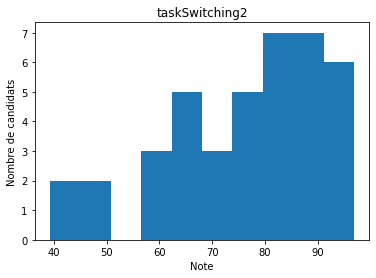

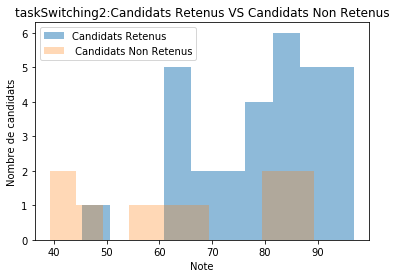

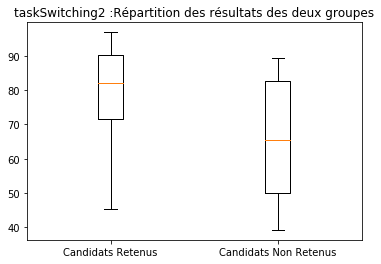

test de normalité pour la partie des candidats retenus(0.946191132068634, 0.1335669904947281)
test de normalité pour la partie des candidats non retenus(0.9144232869148254, 0.31277671456336975)
les deux parties de taskSwitching2 suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=4.485205716180708, pvalue=0.04078908601756851)
l'égalité de variance n'est pas verifiée pour les deux parties donc on applique le test de Welch
résulat test de WelchTtest_indResult(statistic=2.603151995987557, pvalue=0.01310238786833744)


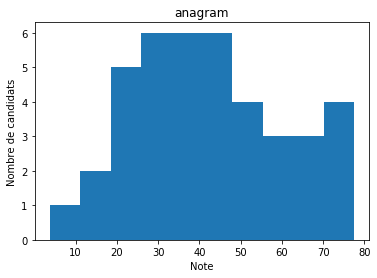

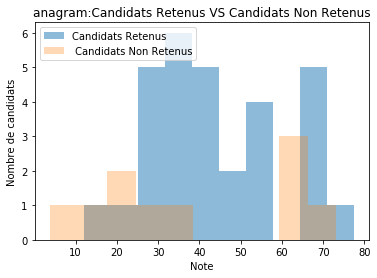

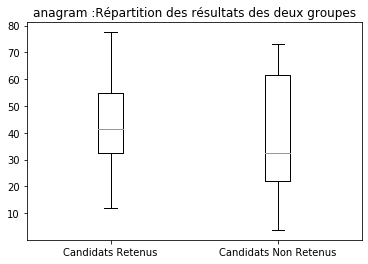

test de normalité pour la partie des candidats retenus(0.9578094482421875, 0.2720140814781189)
test de normalité pour la partie des candidats non retenus(0.914657473564148, 0.3145390450954437)
les deux parties de anagram suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=3.733273058155871, pvalue=0.06081935646292747)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=0.7770040557329355, pvalue=0.44196668429755903)


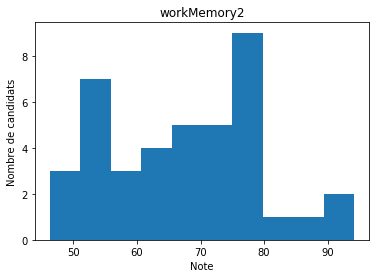

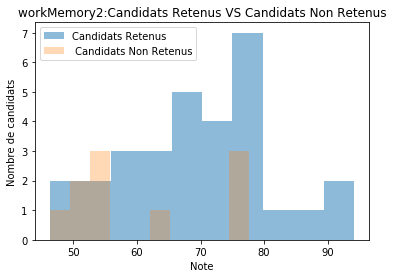

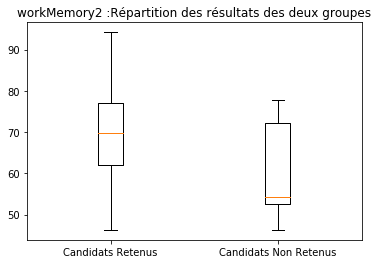

test de normalité pour la partie des candidats retenus(0.9862769842147827, 0.9568786025047302)
test de normalité pour la partie des candidats non retenus(0.8405150175094604, 0.044755708426237106)
les deux parties de workMemory2 ne suivent pas suivent la lois normal donc on applique le Test U
résultat de Test UMannwhitneyuResult(statistic=85.0, pvalue=0.021971111434839125)


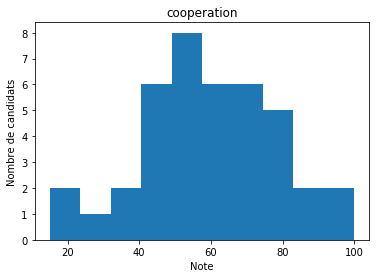

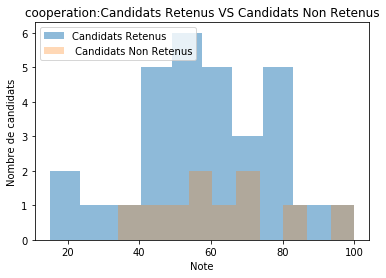

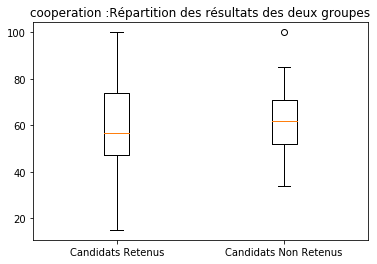

test de normalité pour la partie des candidats retenus(0.9766411781311035, 0.7309681177139282)
test de normalité pour la partie des candidats non retenus(0.9800344705581665, 0.9653523564338684)
les deux parties de cooperation suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=0.0053713005377694105, pvalue=0.9419604466682314)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=-0.7597089155895695, pvalue=0.4521162070225637)


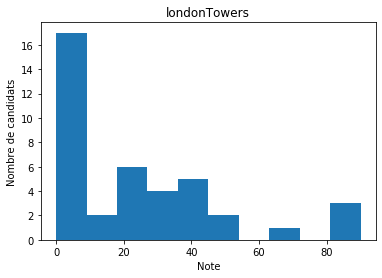

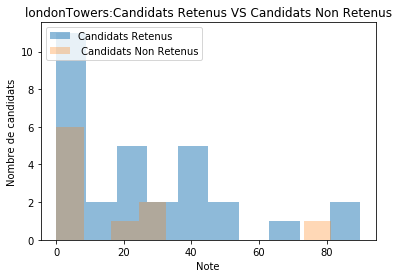

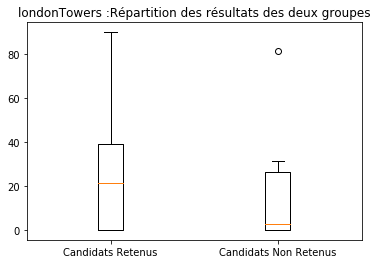

test de normalité pour la partie des candidats retenus(0.8642175793647766, 0.0012489515356719494)
test de normalité pour la partie des candidats non retenus(0.7132614850997925, 0.0012757296208292246)
les deux parties de londonTowers ne suivent pas suivent la lois normal donc on applique le Test U
résultat de Test UMannwhitneyuResult(statistic=121.0, pvalue=0.1787455769264712)


In [247]:
gameNames=["taskSwitching2","anagram","workMemory2","cooperation","londonTowers"]
for i in gameNames :
    testGame(i,dataFrameGame)
  

In [248]:
dataFrameGame

Test       Statistic test   Statistic   p-value
4  taskSwitching2       Welch’s t-test    2.603152  0.013102
3         anagram               T-test    0.777004  0.441967
2     workMemory2  Mann Whitney U test   85.000000  0.021971
1     cooperation               T-test   -0.759709  0.452116
0    londonTowers  Mann Whitney U test  121.000000  0.178746

In [249]:
dataFrameQues = pd.DataFrame(columns = ['Test',"Statistic test","Statistic","p-value"])  

In [250]:
quesListe=["Reconnaissance d'expressions faciales - version 4 (courte) (R&D)","Test logique - variante 1 version 5 (R&D)"]

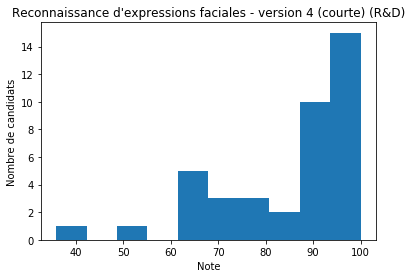

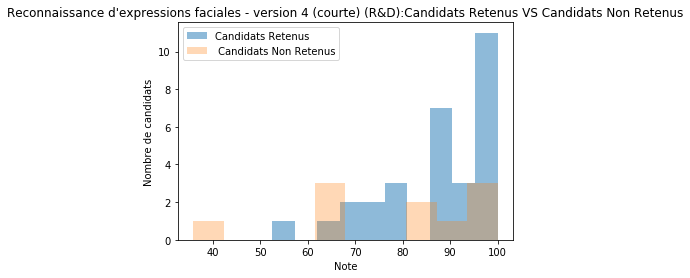

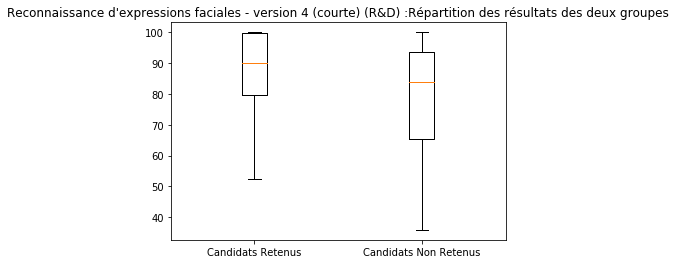

test de normalité pour la partie des candidats retenus(0.8679884672164917, 0.0015116484137251973)
test de normalité pour la partie des candidats non retenus(0.9023687839508057, 0.23256951570510864)
les deux parties de Reconnaissance d'expressions faciales - version 4 (courte) (R&D) ne suivent pas suivent la lois normal donc on applique le Test U
résultat de Test UMannwhitneyuResult(statistic=107.5, pvalue=0.09300970377166562)


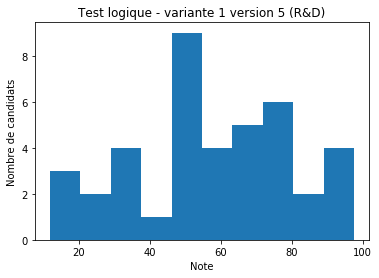

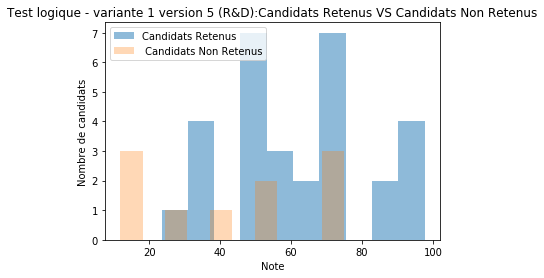

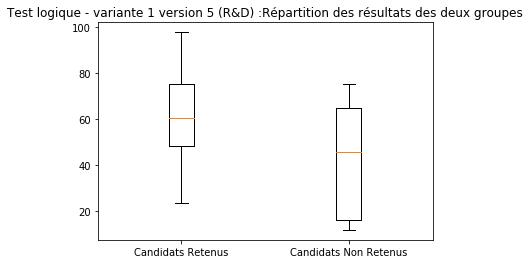

test de normalité pour la partie des candidats retenus(0.9603022933006287, 0.3153286874294281)
test de normalité pour la partie des candidats non retenus(0.8795528411865234, 0.12895919382572174)
les deux parties de Test logique - variante 1 version 5 (R&D) suivent la lois normal
le résultat du test d'égalité des variances  LeveneResult(statistic=1.135900863858301, pvalue=0.29324531102927465)
l'égalité de variance est verifiée pour les deux parties donc on applique le test de Student
résulat test de StudentTtest_indResult(statistic=2.4942498301206912, pvalue=0.017088976006431115)


In [253]:
for j in quesListe:
    #print(j)
    test(j,dataFrameQues)

In [254]:
dataFrameQues

Test       Statistic test  \
1  Reconnaissance d'expressions faciales - versio...  Mann Whitney U test   
0          Test logique - variante 1 version 5 (R&D)               T-test   

   Statistic   p-value  
1  107.50000  0.093010  
0    2.49425  0.017089

In [255]:
dataFrameGameQues=pd.concat([dataFrameQues,dataFrameGame])

In [256]:
dataFrameGameQues

Test       Statistic test  \
1  Reconnaissance d'expressions faciales - versio...  Mann Whitney U test   
0          Test logique - variante 1 version 5 (R&D)               T-test   
4                                     taskSwitching2       Welch’s t-test   
3                                            anagram               T-test   
2                                        workMemory2  Mann Whitney U test   
1                                        cooperation               T-test   
0                                       londonTowers  Mann Whitney U test   

    Statistic   p-value  
1  107.500000  0.093010  
0    2.494250  0.017089  
4    2.603152  0.013102  
3    0.777004  0.441967  
2   85.000000  0.021971  
1   -0.759709  0.452116  
0  121.000000  0.178746

In [257]:
y_Axe=pd.DataFrame(resultGames.iloc[:,-1])
x_Axe=pd.DataFrame(resultGames.iloc[:,1:7])    

In [258]:
y_Axe

Selected
0      True
1      True
2      True
3      True
4      True
5     False
6      True
7      True
8      True
9      True
10     True
11     True
12    False
13     True
14    False
15     True
16    False
17     True
18     True
19    False
20    False
21     True
22     True
23     True
24    False
25     True
26     True
27    False
28    False
29     True
30     True
31     True
32     True
33     True
34     True
35    False
36     True
37     True
38     True
39     True

In [259]:
x_Axe

Capacité d'analyse  Capacité d'apprentissage, mémoire  \
0                   59                                 69   
1                   34                                 66   
2                   71                                 84   
3                   50                                 66   
4                   98                                 62   
5                   69                                 78   
6                   71                                 88   
7                   75                                 92   
8                   60                                 70   
9                   35                                 46   
10                  48                                 76   
11                  50                                 73   
12                  75                                 75   
13                  61                                 55   
14                  12                                 55   
15                  96                                 77   
16                  52                                 53   
17                  97                                 75   
18                  67                                 66   
19                  12                                 54   
20                  50                                 52   
21                  24                                 64   
22                  35                                 50   
23                  48                                 78   
24                  28                                 46   
25                  50                                 55   
26                  59                                 58   
27                  12                                 65   
28                  41                                 53   
29                  50                                 78   
30                  75                                 77   
31                  38                                 63   
32                  86                                 60   
33                  75                                 68   
34                  88                                 75   
35                  75                                 75   
36                  70                                 74   
37                  75                                 60   
38                  95                                 72   
39                  46                                 94   

    Esprit d'équipe, sens du groupe  Organisation, planification  \
0                                55                            0   
1                                52                           30   
2                                87                           37   
3                                71                           21   
4                                64                           90   
5                                67                           22   
6                                91                           29   
7                                82                           39   
8                                71                           13   
9                                49                            0   
10                               76                            0   
11                               83                            0   
12                               86                           81   
13                               76                            0   
14                               60                            0   
15                               82                           46   
16                               49                            0   
17                               72                           81   
18                               73                           21   
19                               75                            0   
20                               72                           28   
21    

In [260]:
def createModel(dataX,dataY):
    modelAxe = pd.DataFrame(columns = ['Test',"Coefficient"])  

    column_labels = dataX.columns.tolist()
    #X_Axe_Train,X_Axe_Test,Y_Axe_Train,Y_Axe_Test=train_test_split(dataX,dataY,test_size=1,random_state=1)
    stndrd=StandardScaler()
    X_Axe_Train=stndrd.fit_transform(dataX)
    X_Axe_Test=stndrd.fit_transform(dataX)
    logModelAxe=LogisticRegression()
    logModelAxe.fit(X_Axe_Train,dataY)
    
    Y_Axe_Pred=cross_val_predict(logModelAxe,X_Axe_Test,dataY)
    print(classification_report(dataY,Y_Axe_Pred))
    
    for i in range(0,len(column_labels)):
        modelAxe.loc[-1]=[column_labels[i],logModelAxe.coef_[0][i]]
        modelAxe.index=modelAxe.index+1
    return(modelAxe)

In [261]:
modelRegAxe=createModel(x_Axe,y_Axe)

              precision    recall  f1-score   support

       False       0.60      0.30      0.40        10
        True       0.80      0.93      0.86        30

    accuracy                           0.78        40
   macro avg       0.70      0.62      0.63        40
weighted avg       0.75      0.78      0.75        40



/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

In [262]:
modelRegAxe


Test  Coefficient
5                 Capacité d'analyse     0.580955
4  Capacité d'apprentissage, mémoire     0.339687
3    Esprit d'équipe, sens du groupe     0.001814
2        Organisation, planification    -0.168054
1     Orientation résultat, ténacité     0.064330
0    Souplesse mentale, multitasking     0.564113

In [263]:
modelRegAxe=modelRegAxe.join(dataFrameAxes, on='Test')


In [264]:
modelRegAxe.sort_values( by=['Coefficient'], ascending=False, inplace=True)
modelRegAxe

Test  Coefficient       Statistic test  \
5                 Capacité d'analyse     0.580955               T-test   
0    Souplesse mentale, multitasking     0.564113       Welch’s t-test   
4  Capacité d'apprentissage, mémoire     0.339687               T-test   
1     Orientation résultat, ténacité     0.064330               T-test   
3    Esprit d'équipe, sens du groupe     0.001814               T-test   
2        Organisation, planification    -0.168054  Mann Whitney U test   

    Statistic   p-value  
5    2.522578  0.015957  
0    2.608297  0.012937  
4    2.150199  0.037966  
1    0.772245  0.444746  
3    0.523458  0.603695  
2  122.000000  0.187257

In [265]:
x_Ques=pd.DataFrame(resultGames.iloc[:,25:27])  

In [266]:
x_Ques

Reconnaissance d'expressions faciales - version 4 (courte) (R&D)  \
0                                           62.125915                  
1                                           52.500000                  
2                                          100.000000                  
3                                           90.000000                  
4                                           91.091197                  
5                                           64.060563                  
6                                          100.000000                  
7                                          100.000000                  
8                                           80.000000                  
9                                           73.258592                  
10                                          88.934577                  
11                                          90.000000                  
12                                         100.000000                  
13                                          73.878028                  
14                                          35.861549                  
15                                          87.195106                  
16                                          64.627746                  
17                                          70.780246                  
18                                          67.500000                  
19                                          83.416901                  
20                                          88.936796                  
21                                          94.094718                  
22                                          78.445915                  
23                                          97.190493                  
24                                          67.500000                  
25                                          79.478873                  
26                                          89.183979                  
27                                         100.000000                  
28                                          84.006444                  
29                                         100.000000                  
30                                         100.000000                  
31                                         100.000000                  
32                                         100.000000                  
33                                          98.408099                  
34                                          95.682746                  
35                                          95.109155                  
36                                          88.077359                  
37                                          90.000000                  
38                                         100.000000                  
39                                          90.568662                  

    Test logique - variante 1 version 5 (R&D)  
0                                   59.452479  
1                                   33.669396  
2                                   70.516494  
3                                   50.000000  
4                                   97.626786  
5                                   68.833999  
6                                   70.569572  
7                                   74.796006  
8                                   60.017622  
9                                   34.898719  
10                                  47.893985  
11                                  50.000000  
12                                  75.000000  
13                                  60.569020  
14                                  11.862653  
15                                  96.422650  
16                                  52.336290  
17                                  96.625282  
18                                  66.792434  
19                                  11.969044  
20                                  50.2374

In [267]:
modelRegQues=createModel(x_Ques,y_Axe)

              precision    recall  f1-score   support

       False       0.67      0.20      0.31        10
        True       0.78      0.97      0.87        30

    accuracy                           0.78        40
   macro avg       0.73      0.58      0.59        40
weighted avg       0.75      0.78      0.73        40



/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

In [190]:
modelRegQues

Test  Coefficient
1  Reconnaissance d'expressions faciales - versio...     0.334174
0          Test logique - variante 1 version 5 (R&D)     0.726188

In [193]:
resultGames

candidateId  Capacité d'analyse  \
0   5f070b7a25469100190fb2b0                  59   
1   5f0eb920ba74ba0018410d5b                  34   
2   5f0ebe046832940019b5e174                  71   
3   5f0ec6396832940019b5e274                  50   
4   5f0ec6576832940019b5e278                  98   
5   5f0ecb33ba74ba0018411266                  69   
6   5f0ee0186832940019b5e72f                  71   
7   5f0ee5b8ba74ba00184115e6                  75   
8   5f0f0437ba74ba00184116ac                  60   
9   5f0f09016832940019b5ea92                  35   
10  5f1046476832940019b5eedd                  48   
11  5f104831f1a73d001a4d0010                  50   
12  5f116fecba74ba0018412427                  75   
13  5f1199bdf1a73d001a4d0d3e                  61   
14  5f119e266832940019b5fb8f                  12   
15  5f119eaa6832940019b5fba4                  96   
16  5f11a0d36832940019b5fbdc                  52   
17  5f11a11e6832940019b5fbec                  97   
18  5f11b3b1ba74ba00184128b5                  67   
19  5f11bb4df1a73d001a4d12fe                  12   
20  5f11c226ba74ba0018412a0b                  50   
21  5f12a2b7ba74ba0018412ba5                  24   
22  5f12c370f1a73d001a4d149f                  35   
23  5f12f5856832940019b5ffd0                  48   
24  5f1413696832940019b60196                  28   
25  5f157bd26832940019b60534                  50   
26  5f15a0c5ba74ba0018413353                  59   
27  5f15d56e6832940019b608c5                  12   
28  5f16ac40f1a73d001a4d1e66                  41   
29  5f16adf2f1a73d001a4d1ed4                  50   
30  5f16be056832940019b60d8c                  75   
31  5f16d2236832940019b60f64                  38   
32  5f16d8f5f1a73d001a4d2355                  86   
33  5f16da04f1a73d001a4d2363                  75   
34  5f16db306832940019b6116f                  88   
35  5f16e986f1a73d001a4d271b                  75   
36  5f1830fdba74ba0018414721                  70   
37  5f183e9ef1a73d001a4d320f                  75   
38  5f184db5ba74ba00184148f6                  95   
39  5f18a4486832940019b61f8c                  46   

    Capacité d'apprentissage, mémoire  Esprit d'équipe, sens du groupe  \
0                                  69                               55   
1                                  66                               52   
2                                  84                               87   
3                                  66                               71   
4                                  62                               64   
5                                  78                               67   
6                                  88                               91   
7                                  92                               82   
8                                  70                               71   
9                                  46                               49   
10                                 76                               76   
11                                 73                               83   
12                                 75                               86   
13                                 55                               76   
14                                 55                               60   
15                                 77                               82   
16                                 53                               49   
17                                 75                               72   
18                                 66                               73   
19                                 54                               75   
20                                 52                               72   
21                                 64                               83   
22                                 50                               89   
23                                 78                               80   
24                                

In [268]:
x_Game=pd.DataFrame(result[['name','noteGlobal']])  

In [269]:
x_Game=x_Game.pivot(columns="name",values="noteGlobal")

In [272]:
x_Game

name    anagram  cooperation  londonTowers  taskSwitching2  workMemory2
0     55.091581         48.0      0.000000       83.749866    69.189189
1     26.793816         51.0     29.606401       74.959142    65.844146
2     70.850837         74.0     37.184246       92.708333    83.992748
3     44.925223         52.0     21.390625       90.625000    66.207378
4     38.060830         37.0     90.006575       91.666667    61.596848
5     73.228589         70.0     21.935587       87.500000    77.677496
6     42.880748         81.0     28.652508       83.779431    87.875047
7     32.124853         63.0     39.327779       76.542100    91.891892
8     33.407551         61.0     12.519433       82.170973    70.285636
9     70.950260         24.0      0.000000       72.939471    46.276516
10    46.754047         63.0      0.000000       92.904141    76.422292
11    35.494035         76.0      0.000000       61.876163    73.437774
12    60.967344         71.0     81.439619       68.039158    75.361677
13    40.931496         78.0      0.000000       62.031856    54.969694
14    13.412312         85.0      0.000000       80.941994    54.954955
15    77.535988         77.0     45.971358       86.782922    77.194887
16    62.045595         34.0      0.000000       42.633904    52.691438
17    54.348009         73.0     81.439619       95.833333    75.499721
18    69.478519         79.0     21.390625       65.958389    65.949907
19     3.743068         66.0      0.000000       47.403891    53.608728
20    27.283930         55.0     27.938776       83.289678    52.112492
21    53.405590         72.0     18.948097       82.144323    64.113132
22    26.466140        100.0     16.901235       90.711378    50.450450
23    40.580015         62.0     38.772178       77.083333    77.842938
24    37.450288         45.0      0.000000       39.239322    46.333192
25    27.697026         83.0      0.000000       63.512408    54.787830
26    42.225396         47.0      0.000000       65.646463    57.565909
27    61.635299         58.0     31.340271       63.011464    64.545419
28    23.637484        100.0      4.968065       57.679946    52.587377
29    11.927967         43.0      0.000000       85.364152    78.378378
30    54.936145         47.0     44.553254       45.419336    77.176335
31    25.478911         49.0     43.654337       68.204337    62.770140
32    68.153812         43.0     22.074711       84.589794    59.817971
33    43.699938         15.0     48.736205       77.423251    67.520480
34    25.698762         58.0     64.697543       71.021011    75.232892
35    21.623817         51.0      0.000000       89.363337    74.894746
36    19.954629         55.0      0.000000       77.296787    73.873874
37    66.831905         23.0      0.000000       89.495615    60.071300
38    32.994455         55.0      0.000000       96.875000    71.643234
39    37.308856         55.0     22.074711       94.801109    94.185067

In [273]:
x_Ques

Reconnaissance d'expressions faciales - version 4 (courte) (R&D)  \
0                                           62.125915                  
1                                           52.500000                  
2                                          100.000000                  
3                                           90.000000                  
4                                           91.091197                  
5                                           64.060563                  
6                                          100.000000                  
7                                          100.000000                  
8                                           80.000000                  
9                                           73.258592                  
10                                          88.934577                  
11                                          90.000000                  
12                                         100.000000                  
13                                          73.878028                  
14                                          35.861549                  
15                                          87.195106                  
16                                          64.627746                  
17                                          70.780246                  
18                                          67.500000                  
19                                          83.416901                  
20                                          88.936796                  
21                                          94.094718                  
22                                          78.445915                  
23                                          97.190493                  
24                                          67.500000                  
25                                          79.478873                  
26                                          89.183979                  
27                                         100.000000                  
28                                          84.006444                  
29                                         100.000000                  
30                                         100.000000                  
31                                         100.000000                  
32                                         100.000000                  
33                                          98.408099                  
34                                          95.682746                  
35                                          95.109155                  
36                                          88.077359                  
37                                          90.000000                  
38                                         100.000000                  
39                                          90.568662                  

    Test logique - variante 1 version 5 (R&D)  
0                                   59.452479  
1                                   33.669396  
2                                   70.516494  
3                                   50.000000  
4                                   97.626786  
5                                   68.833999  
6                                   70.569572  
7                                   74.796006  
8                                   60.017622  
9                                   34.898719  
10                                  47.893985  
11                                  50.000000  
12                                  75.000000  
13                                  60.569020  
14                                  11.862653  
15                                  96.422650  
16                                  52.336290  
17                                  96.625282  
18                                  66.792434  
19                                  11.969044  
20                                  50.2374

In [274]:
x_Game_Ques=x_Ques.join(x_Game)

In [275]:
x_Game_Ques

Reconnaissance d'expressions faciales - version 4 (courte) (R&D)  \
0                                           62.125915                  
1                                           52.500000                  
2                                          100.000000                  
3                                           90.000000                  
4                                           91.091197                  
5                                           64.060563                  
6                                          100.000000                  
7                                          100.000000                  
8                                           80.000000                  
9                                           73.258592                  
10                                          88.934577                  
11                                          90.000000                  
12                                         100.000000                  
13                                          73.878028                  
14                                          35.861549                  
15                                          87.195106                  
16                                          64.627746                  
17                                          70.780246                  
18                                          67.500000                  
19                                          83.416901                  
20                                          88.936796                  
21                                          94.094718                  
22                                          78.445915                  
23                                          97.190493                  
24                                          67.500000                  
25                                          79.478873                  
26                                          89.183979                  
27                                         100.000000                  
28                                          84.006444                  
29                                         100.000000                  
30                                         100.000000                  
31                                         100.000000                  
32                                         100.000000                  
33                                          98.408099                  
34                                          95.682746                  
35                                          95.109155                  
36                                          88.077359                  
37                                          90.000000                  
38                                         100.000000                  
39                                          90.568662                  

    Test logique - variante 1 version 5 (R&D)    anagram  cooperation  \
0                                   59.452479  55.091581         48.0   
1                                   33.669396  26.793816         51.0   
2                                   70.516494  70.850837         74.0   
3                                   50.000000  44.925223         52.0   
4                                   97.626786  38.060830         37.0   
5                                   68.833999  73.228589         70.0   
6                                   70.569572  42.880748         81.0   
7                                   74.796006  32.124853         63.0   
8                                   60.017622  33.407551         61.0   
9                                   34.898719  70.950260         24.0   
10                                  47.893985  46.754047         63.0   
11                                  50.000000  35.494035         76.0   
12                                  75.000000  60.967344         71.0   
13                           

In [276]:
modelRegGameQues=createModel(x_Game_Ques,y_Axe)

              precision    recall  f1-score   support

       False       0.40      0.20      0.27        10
        True       0.77      0.90      0.83        30

    accuracy                           0.73        40
   macro avg       0.59      0.55      0.55        40
weighted avg       0.68      0.72      0.69        40



/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/oussamasassi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

In [277]:
modelRegGameQues=modelRegGameQues.join(dataFrameGameQues.set_index("Test"), on='Test')


In [278]:
modelRegGameQues

Test  Coefficient  \
6  Reconnaissance d'expressions faciales - versio...     0.282687   
5          Test logique - variante 1 version 5 (R&D)     0.515095   
4                                            anagram     0.013161   
3                                        cooperation    -0.207347   
2                                       londonTowers    -0.262290   
1                                     taskSwitching2     0.608317   
0                                        workMemory2     0.285313   

        Statistic test   Statistic   p-value  
6  Mann Whitney U test  107.500000  0.093010  
5               T-test    2.494250  0.017089  
4               T-test    0.777004  0.441967  
3               T-test   -0.759709  0.452116  
2  Mann Whitney U test  121.000000  0.178746  
1       Welch’s t-test    2.603152  0.013102  
0  Mann Whitney U test   85.000000  0.021971

In [279]:
modelRegGameQues.sort_values( by=['Coefficient'], ascending=False, inplace=True)
modelRegGameQues

Test  Coefficient  \
1                                     taskSwitching2     0.608317   
5          Test logique - variante 1 version 5 (R&D)     0.515095   
0                                        workMemory2     0.285313   
6  Reconnaissance d'expressions faciales - versio...     0.282687   
4                                            anagram     0.013161   
3                                        cooperation    -0.207347   
2                                       londonTowers    -0.262290   

        Statistic test   Statistic   p-value  
1       Welch’s t-test    2.603152  0.013102  
5               T-test    2.494250  0.017089  
0  Mann Whitney U test   85.000000  0.021971  
6  Mann Whitney U test  107.500000  0.093010  
4               T-test    0.777004  0.441967  
3               T-test   -0.759709  0.452116  
2  Mann Whitney U test  121.000000  0.178746